In [9]:
import pandas as pd
import matplotlib.ticker as mtick
from fontTools.misc.py23 import StringIO
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler

# Loading The Dataset

In [57]:
# Function to check if a value is a valid number
def is_valid(value):
    try:
        float(value) 
        return True
    except ValueError:
        return False

# Function to load the data from file
def load_and_convert(filepath, encoding='utf-8'):
    try:
        data = pd.read_csv(filepath, sep='\s+', header=None, names=["time", "amplitude"], encoding=encoding)
    except UnicodeDecodeError:
        data = pd.read_csv(filepath, sep='\s+', header=None, names=["time", "amplitude"], encoding='ISO-8859-1')
    return data

# Main function to load, clean, and convert data
def load_check_and_clean(filepath, encoding='utf-8'):
    # Load the data
    data = load_and_convert(filepath, encoding)

    # Check columns
    if 'amplitude' not in data.columns:
        raise KeyError(f"The 'amplitude' column is missing in {filepath}. Columns found: {data.columns.tolist()}")

    # Check for NaN values in 'amplitude' and 'time'
    for col in ['amplitude', 'time']:
        nan_count = data[col].isna().sum()
        if nan_count > 0:
            print(f"\nFound {nan_count} NaN values in '{col}'. Removing rows with NaN values...")
            data = data.dropna(subset=[col])

    # Check for duplicated rows
    duplicated_rows = data[data.duplicated()]
    if not duplicated_rows.empty:
        print(f'\nDuplicated rows detected:\n{duplicated_rows}')

    # Identify invalid rows
    data['IsValidAmplitude'] = data['amplitude'].apply(is_valid)
    data['IsValidTime'] = data['time'].apply(is_valid)

    invalid_amplitude_rows = data[~data['IsValidAmplitude']]
    invalid_time_rows = data[~data['IsValidTime']]
    
    # Print invalid rows for 'amplitude' and 'time'
    if not invalid_amplitude_rows.empty:
        print("\nInvalid rows in 'amplitude':")
        print(invalid_amplitude_rows)
    
    if not invalid_time_rows.empty:
        print("\nInvalid rows in 'time':")
        print(invalid_time_rows)

    # Filter out invalid rows
    data_cleaned = data[data['IsValidAmplitude'] & data['IsValidTime']].copy()

    # Drop helper columns
    data_cleaned = data_cleaned.drop(columns=['IsValidAmplitude', 'IsValidTime'])

    # Convert 'amplitude' and 'time' columns to float64
    data_cleaned['amplitude'] = data_cleaned['amplitude'].astype(float)
    data_cleaned['time'] = data_cleaned['time'].astype(float)

    # Print data types and preview of cleaned data
    print(f"\nData types after cleaning in {filepath}:")
    print(data_cleaned.dtypes)

    print("\nPreview of cleaned data (first 5 rows):")
    print(data_cleaned.head())

    # Return cleaned data
    return data_cleaned


In [58]:
# Load and process each dataset
patient1_data = load_check_and_clean('emg_healthy.txt')


Invalid rows in 'amplitude':
           time          amplitude  IsValidAmplitude  IsValidTime
638     0.15975  -0.0383+\ED0.0350             False         True
41463  10.36600    0.1117+\F0.1050             False         True

Data types after cleaning in emg_healthy.txt:
time         float64
amplitude    float64
dtype: object

Preview of cleaned data (first 5 rows):
      time  amplitude
0  0.00025    -0.0333
1  0.00050    -0.0350
2  0.00075    -0.0350
3  0.00100    -0.0300
4  0.00125    -0.0300


In [59]:
patient2_data = load_check_and_clean('emg_myopathy.txt')


Invalid rows in 'amplitude':
          time      amplitude  IsValidAmplitude  IsValidTime
64467  16.1172  0.006750.0250             False         True
93750  23.4572  0.2617Ü0.0850             False         True

Data types after cleaning in emg_myopathy.txt:
time         float64
amplitude    float64
dtype: object

Preview of cleaned data (first 5 rows):
      time  amplitude
0  0.00025    -0.0050
1  0.00050    -0.0100
2  0.00075    -0.0050
3  0.00100    -0.0100
4  0.00125    -0.0067


In [60]:
patient3_data = load_check_and_clean('emg_neuropathy.txt')


Invalid rows in 'amplitude':
         time      amplitude  IsValidAmplitude  IsValidTime
71193  17.840  0.1716ì0.1950             False         True
84053  21.055        0.0183/             False         True

Data types after cleaning in emg_neuropathy.txt:
time         float64
amplitude    float64
dtype: object

Preview of cleaned data (first 5 rows):
      time  amplitude
0  0.00025     0.0900
1  0.00050     0.0767
2  0.00075     0.0767
3  0.00100     0.0733
4  0.00125     0.0717


# Shape of the data before Splitting


In [18]:
# check number of rows and colums before spliitting the data
print(f"Patient 1 shape: {patient1_data.shape}")
print(f"Patient 2 shape: {patient2_data.shape}")
print(f"Patient 3 shape: {patient3_data.shape}")

Patient 1 shape: (50858, 2)
Patient 2 shape: (110335, 2)
Patient 3 shape: (147857, 2)


# Splitting the Datasets according to Training Ratios

In [19]:
# ratios for splitting training data
train_ratio_patient1 = 0.1718
train_ratio_patient2 = 0.3436
train_ratio_patient3 = 0.4847

# splitting data based on the above ratios
train_patient1, test_patient1 = train_test_split( patient1_data, train_size= train_ratio_patient1, random_state = 45)
train_patient2, test_patient2 = train_test_split( patient2_data, train_size= train_ratio_patient2, random_state = 45)
train_patient3, test_patient3 = train_test_split( patient3_data, train_size= train_ratio_patient3, random_state = 45)

# Shape of the Datasets after Splitting the Data

In [20]:
# ratios for train and test splits
train_ratio_patient1 = 0.1718
test_ratio_patient1 = 0.1220

train_ratio_patient2 = 0.3436
test_ratio_patient2 = 0.4146

train_ratio_patient3 = 0.4847
test_ratio_patient3 = 0.4634

# Calculate split indices for each dataset based on train ratios
split_index_train_patient1 = int(len(patient1_data) * train_ratio_patient1)
split_index_test_patient1 = split_index_train_patient1 + int(len(patient1_data) * test_ratio_patient1)

split_index_train_patient2 = int(len(patient2_data) * train_ratio_patient2)
split_index_test_patient2 = split_index_train_patient2 + int(len(patient2_data) * test_ratio_patient2)

split_index_train_patient3 = int(len(patient3_data) * train_ratio_patient3)
split_index_test_patient3 = split_index_train_patient3 + int(len(patient3_data) * test_ratio_patient3)

# Chronologically split each dataset into train and test sets
train_patient1 = patient1_data[:split_index_train_patient1]
test_patient1 = patient1_data[split_index_train_patient1:split_index_test_patient1]

train_patient2 = patient2_data[:split_index_train_patient2]
test_patient2 = patient2_data[split_index_train_patient2:split_index_test_patient2]

train_patient3 = patient3_data[:split_index_train_patient3]
test_patient3 = patient3_data[split_index_train_patient3:split_index_test_patient3]

# Optionally, check the resulting lengths of each set to confirm the split proportions
print(f"Patient 1: Train size = {len(train_patient1)}, Test size = {len(test_patient1)}")
print(f"Patient 2: Train size = {len(train_patient2)}, Test size = {len(test_patient2)}")
print(f"Patient 3: Train size = {len(train_patient3)}, Test size = {len(test_patient3)}")

Patient 1: Train size = 8737, Test size = 6204
Patient 2: Train size = 37911, Test size = 45744
Patient 3: Train size = 71666, Test size = 68516


# Few Data Insights

In [21]:
train_patient1.describe()

,time,amplitude
count,8737.000000,8737.000000
mean,1.092482,0.001650
std,0.630604,0.077038
min,0.000250,-0.396700
25%,0.546500,-0.031700
50%,1.092500,-0.001700
75%,1.638500,0.031700
max,2.184500,0.548300


In [22]:
train_patient2.describe()

,time,amplitude
count,37911.000000,37911.000000
mean,4.739105,0.000754
std,2.736132,0.096143
min,0.000250,-0.598300
25%,2.369625,-0.033300
50%,4.739000,-0.005000
75%,7.108625,0.030000
max,9.478000,0.775000


In [23]:
train_patient3.describe()

,time,amplitude
count,71666.000000,71666.000000
mean,8.971421,-0.016116
std,5.187591,0.433772
min,0.000250,-7.255000
25%,4.479313,-0.023300
50%,8.958375,0.008300
75%,13.478925,0.078300
max,17.958200,3.260000


# Visualizations

Number of zeros in amplitude: 131


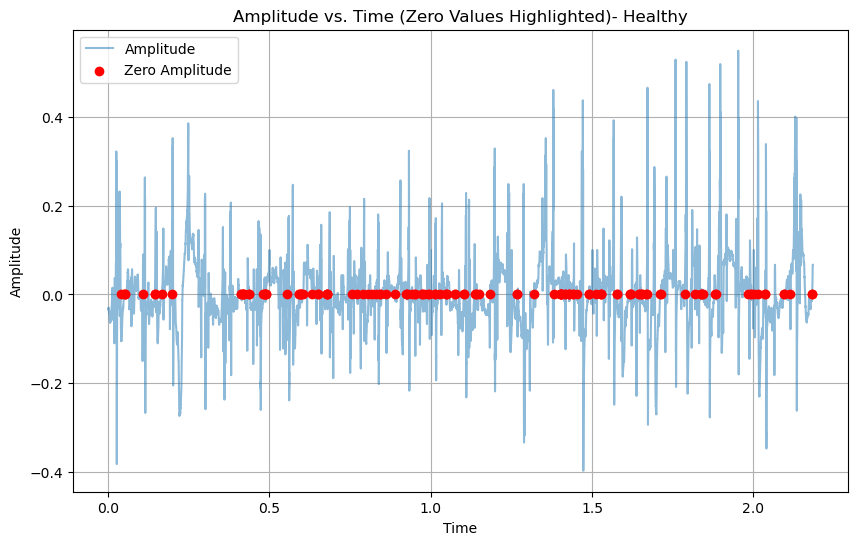

In [35]:
# Count the number of zeros in the 'amplitude' column
zero_count = (train_patient1['amplitude'] == 0).sum()
print(f"Number of zeros in amplitude: {zero_count}")

# Filter rows where amplitude is zero
zero_rows = train_patient1[train_patient1['amplitude'] == 0]

# Visualize the zeros with a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(train_patient1['time'], train_patient1['amplitude'], label='Amplitude', alpha=0.5)
plt.scatter(zero_rows['time'], zero_rows['amplitude'], color='red', label='Zero Amplitude', zorder=5)
plt.title("Amplitude vs. Time (Zero Values Highlighted)- Healthy")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig('Zero Amplitude line_plot_Healthy.png')
plt.show()

    

Number of zeros in amplitude: 634


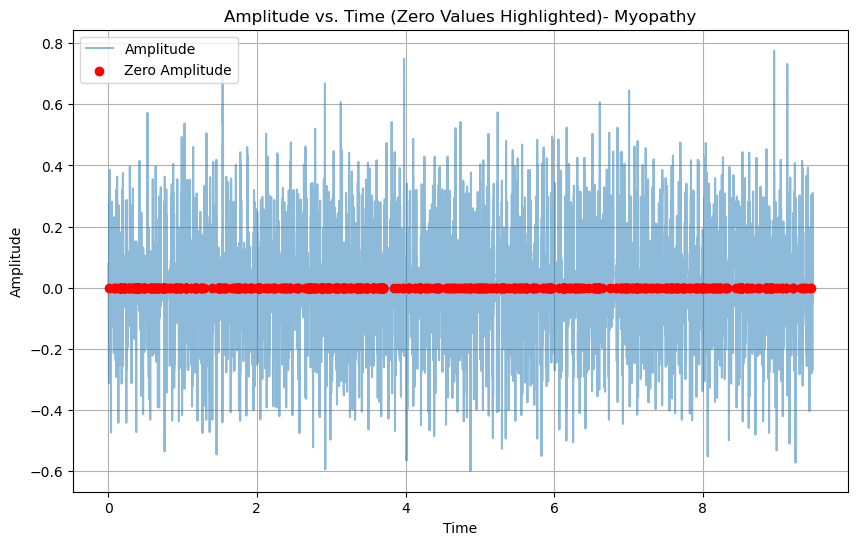

In [36]:
# Count the number of zeros in the 'amplitude' column
zero_count = (train_patient2['amplitude'] == 0).sum()
print(f"Number of zeros in amplitude: {zero_count}")

# Filter rows where amplitude is zero
zero_rows = train_patient2[train_patient2['amplitude'] == 0]

# Visualize the zeros with a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(train_patient2['time'], train_patient2['amplitude'], label='Amplitude', alpha=0.5)
plt.scatter(zero_rows['time'], zero_rows['amplitude'], color='red', label='Zero Amplitude', zorder=5)
plt.title("Amplitude vs. Time (Zero Values Highlighted)- Myopathy")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig('Zero Amplitude line_plot_Myopathy.png')
plt.show()


Number of zeros in amplitude: 1076


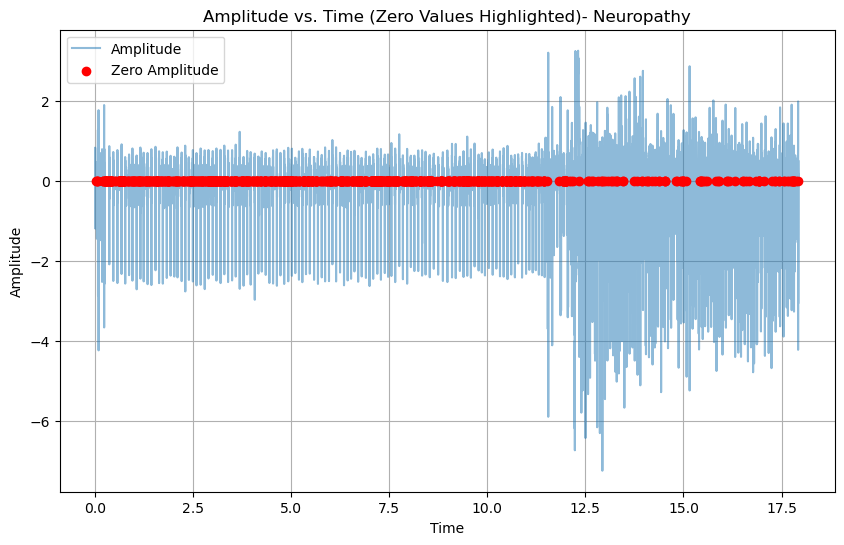

In [37]:
# Count the number of zeros in the 'amplitude' column
zero_count = (train_patient3['amplitude'] == 0).sum()
print(f"Number of zeros in amplitude: {zero_count}")

# Filter rows where amplitude is zero
zero_rows = train_patient3[train_patient3['amplitude'] == 0]

# Visualize the zeros with a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(train_patient3['time'], train_patient3['amplitude'], label='Amplitude', alpha=0.5)
plt.scatter(zero_rows['time'], zero_rows['amplitude'], color='red', label='Zero Amplitude', zorder=5)
plt.title("Amplitude vs. Time (Zero Values Highlighted)- Neuropathy")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig('Zero Amplitude line_plot_Neuropathy.png')
plt.show()


In [38]:
# Function to plot the data
def plot_first_2000_points(data, patient_name):
    # Slice the first 2000 points
    data_subset = data.iloc[:2000]
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_subset['time'], data_subset['amplitude'], label='Amplitude over Time (First 2000 Points)', color='purple', linewidth=1.5)
    
    # Add labels and title
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.title(f'EMG Data for {patient_name} (First 2000 Points)', fontsize=14)
    
    # Add grid and legend
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    plt.savefig(f'line_plot_{patient_name}.png')
    
    # Show the plot
    plt.show()

# plot_first_2000_points(patient1_data, "Patient 1")

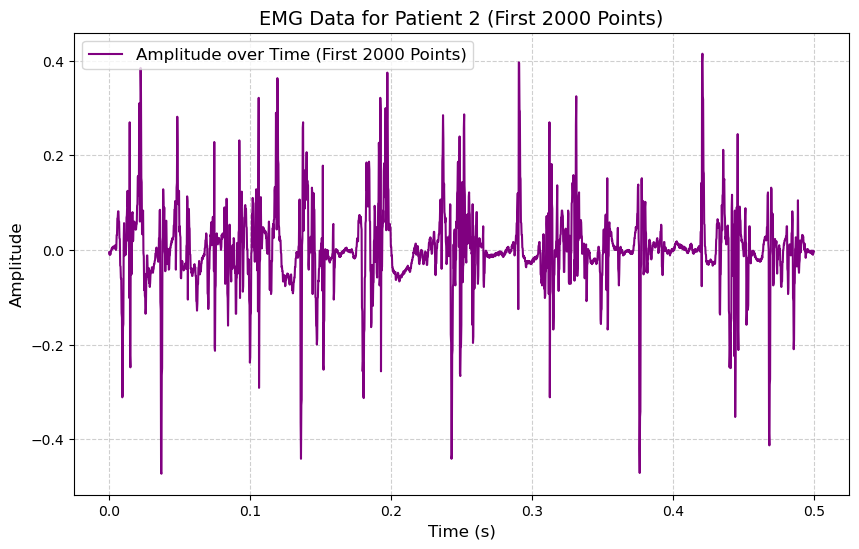

In [25]:
plot_first_2000_points(patient2_data, "Patient 2")

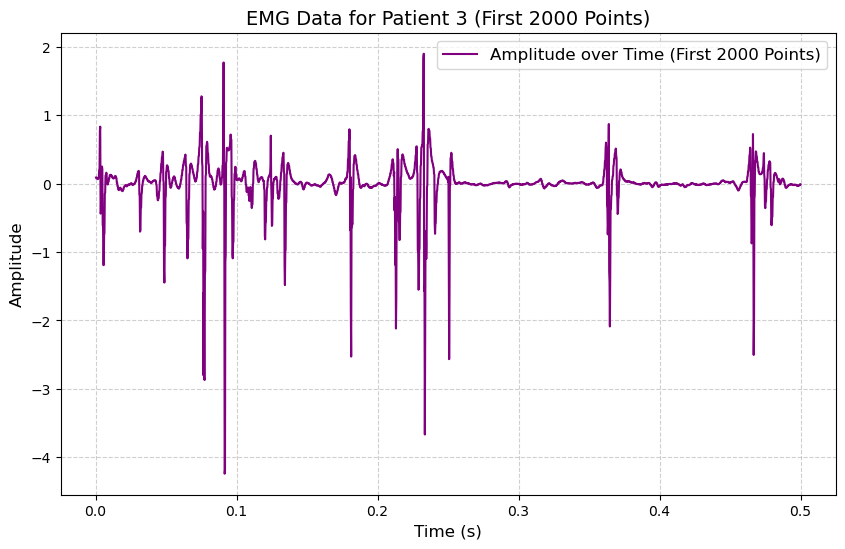

In [26]:
plot_first_2000_points(patient3_data, "Patient 3")

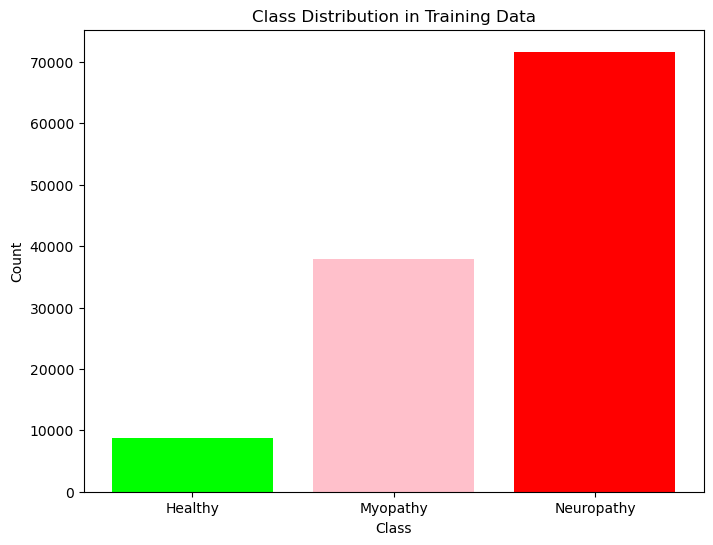

In [27]:
labels = ['Healthy', 'Myopathy', 'Neuropathy']

#class distribution in Training Data

train_counts = [len(train_patient1), len(train_patient2), len(train_patient3)]
plt.figure(figsize=(8, 6))
plt.bar(labels, train_counts, color=['lime', 'pink', 'red'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('class_distribution.png')

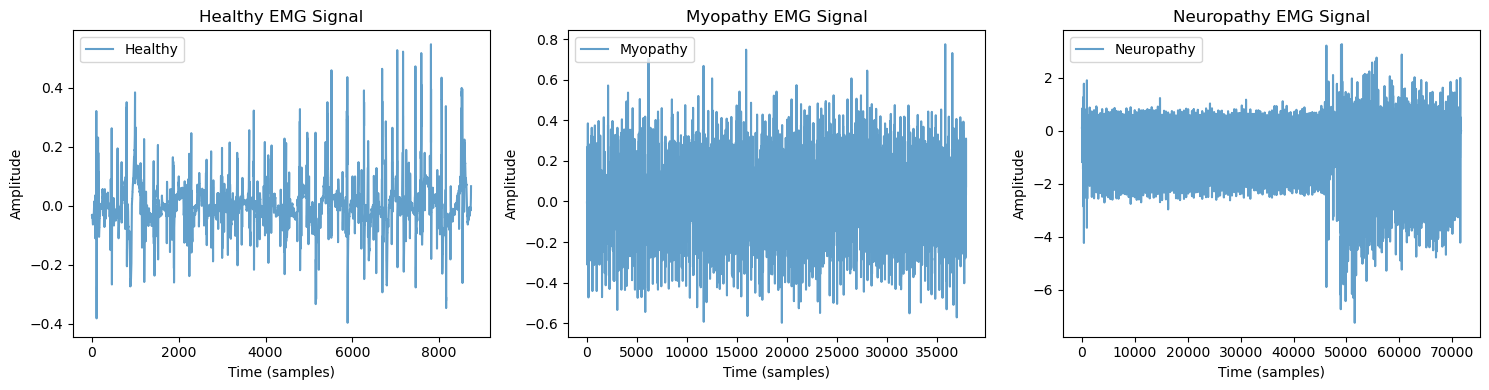

In [28]:
# figure dimensions
plt.figure(figsize=(15, 4))
labels = ['Healthy', 'Myopathy', 'Neuropathy']


for i, (data, label) in enumerate(zip([train_patient1, train_patient2, train_patient3], labels), start=1):
    plt.subplot(1, 3, i)
    plt.plot(data.iloc[:, 1].values, label=label, alpha=0.7)
    plt.title(f'{label} EMG Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.savefig('EMG_SIGNAL_PER_PATIENT.png')
plt.show()


In [45]:
print(f"Minimum amplitude for patient 1: {train_patient1.iloc[:, 1].min()}")
print(f"Minimum amplitude for patient 2: {train_patient2.iloc[:, 1].min()}")
print(f"Minimum amplitude for patient 3: {train_patient3.iloc[:, 1].min()}")

Minimum amplitude for patient 1: -0.3967
Minimum amplitude for patient 2: -0.5983
Minimum amplitude for patient 3: -7.255


In [46]:
print(f"Maximum Amplitude for patient 1: {train_patient1.iloc[:, 1].max()}")
print(f"Maximum Amplitude for patient 2: {train_patient2.iloc[:, 1].max()}")
print(f"Maximum Amplitude for patient 3: {train_patient3.iloc[:, 1].max()}")

Maximum Amplitude for patient 1: 0.5483
Maximum Amplitude for patient 2: 0.775
Maximum Amplitude for patient 3: 3.26


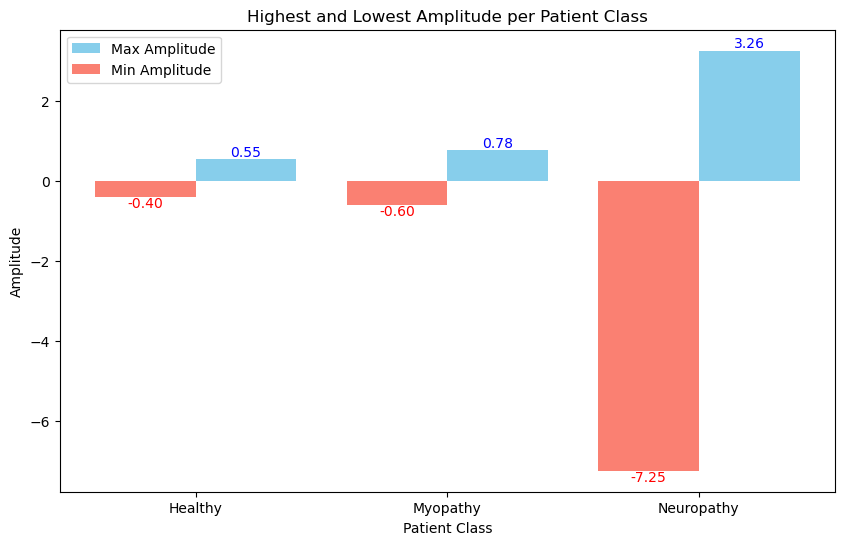

[-0.3967, -0.5983, -7.255]


In [47]:
# Calculate min and max amplitude values for each patient
patients = [train_patient1, train_patient2, train_patient3]
labels = ["Healthy", "Myopathy", "Neuropathy"]

# lists to store min and max amplitude values
min_amplitudes = []
max_amplitudes = []

# Loop through each patient's data
for patient in patients:
    min_amplitude = float(patient.iloc[:, 1].min())  # Adjust column index if needed
    max_amplitude = float(patient.iloc[:, 1].max())  # Adjust column index if needed
    min_amplitudes.append(min_amplitude)
    max_amplitudes.append(max_amplitude)

# Define positions for the bars
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plot max amplitudes as bars 
max_bars = plt.bar([i + 0.2 for i in x], max_amplitudes, width=0.4, label='Max Amplitude', color='skyblue')

# Plot min amplitudes as bars 
min_bars = plt.bar([i - 0.2 for i in x], min_amplitudes, width=0.4, label='Min Amplitude', color='salmon')

# Add labels, title, and legend
plt.xlabel('Patient Class')
plt.ylabel('Amplitude')
plt.title('Highest and Lowest Amplitude per Patient Class')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Add amplitude value labels on top of the bars
for i, (max_bar, min_bar) in enumerate(zip(max_bars, min_bars)):
    # Max amplitude label (on positive side)
    plt.text(max_bar.get_x() + max_bar.get_width() / 2, max_amplitudes[i],
             f'{max_amplitudes[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    # Min amplitude label (on negative side)
    plt.text(min_bar.get_x() + min_bar.get_width() / 2, min_amplitudes[i],
             f'{min_amplitudes[i]:.2f}', ha='center', va='top', fontsize=10, color='red')

# Save and show the plot
plt.savefig('Patient_Amplitude_Extremes_Positive_and_Negative.png')
plt.show()

print(min_amplitudes )

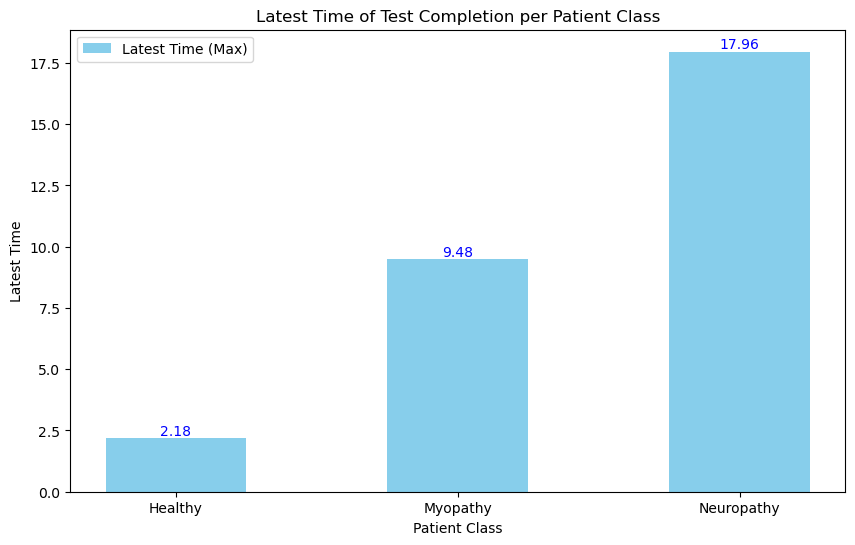

In [48]:
# Calculate the maximum time values (latest time) for each patient
patients = [train_patient1, train_patient2, train_patient3]
labels = ["Healthy", "Myopathy", "Neuropathy"]

# List to store the max time values
max_times = [float(patient.iloc[:, 0].max()) for patient in patients] 

x = range(len(labels))

plt.figure(figsize=(10, 6))
max_bars = plt.bar(x, max_times, width=0.5, color='skyblue', label='Latest Time (Max)')
plt.xlabel('Patient Class')
plt.ylabel('Latest Time')
plt.title('Latest Time of Test Completion per Patient Class')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# adding time value labels on top of the bars
for i, max_bar in enumerate(max_bars):
    plt.text(max_bar.get_x() + max_bar.get_width() / 2, max_times[i],
             f'{max_times[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

plt.savefig('Patient_Latest_Test_Times.png')
plt.show()

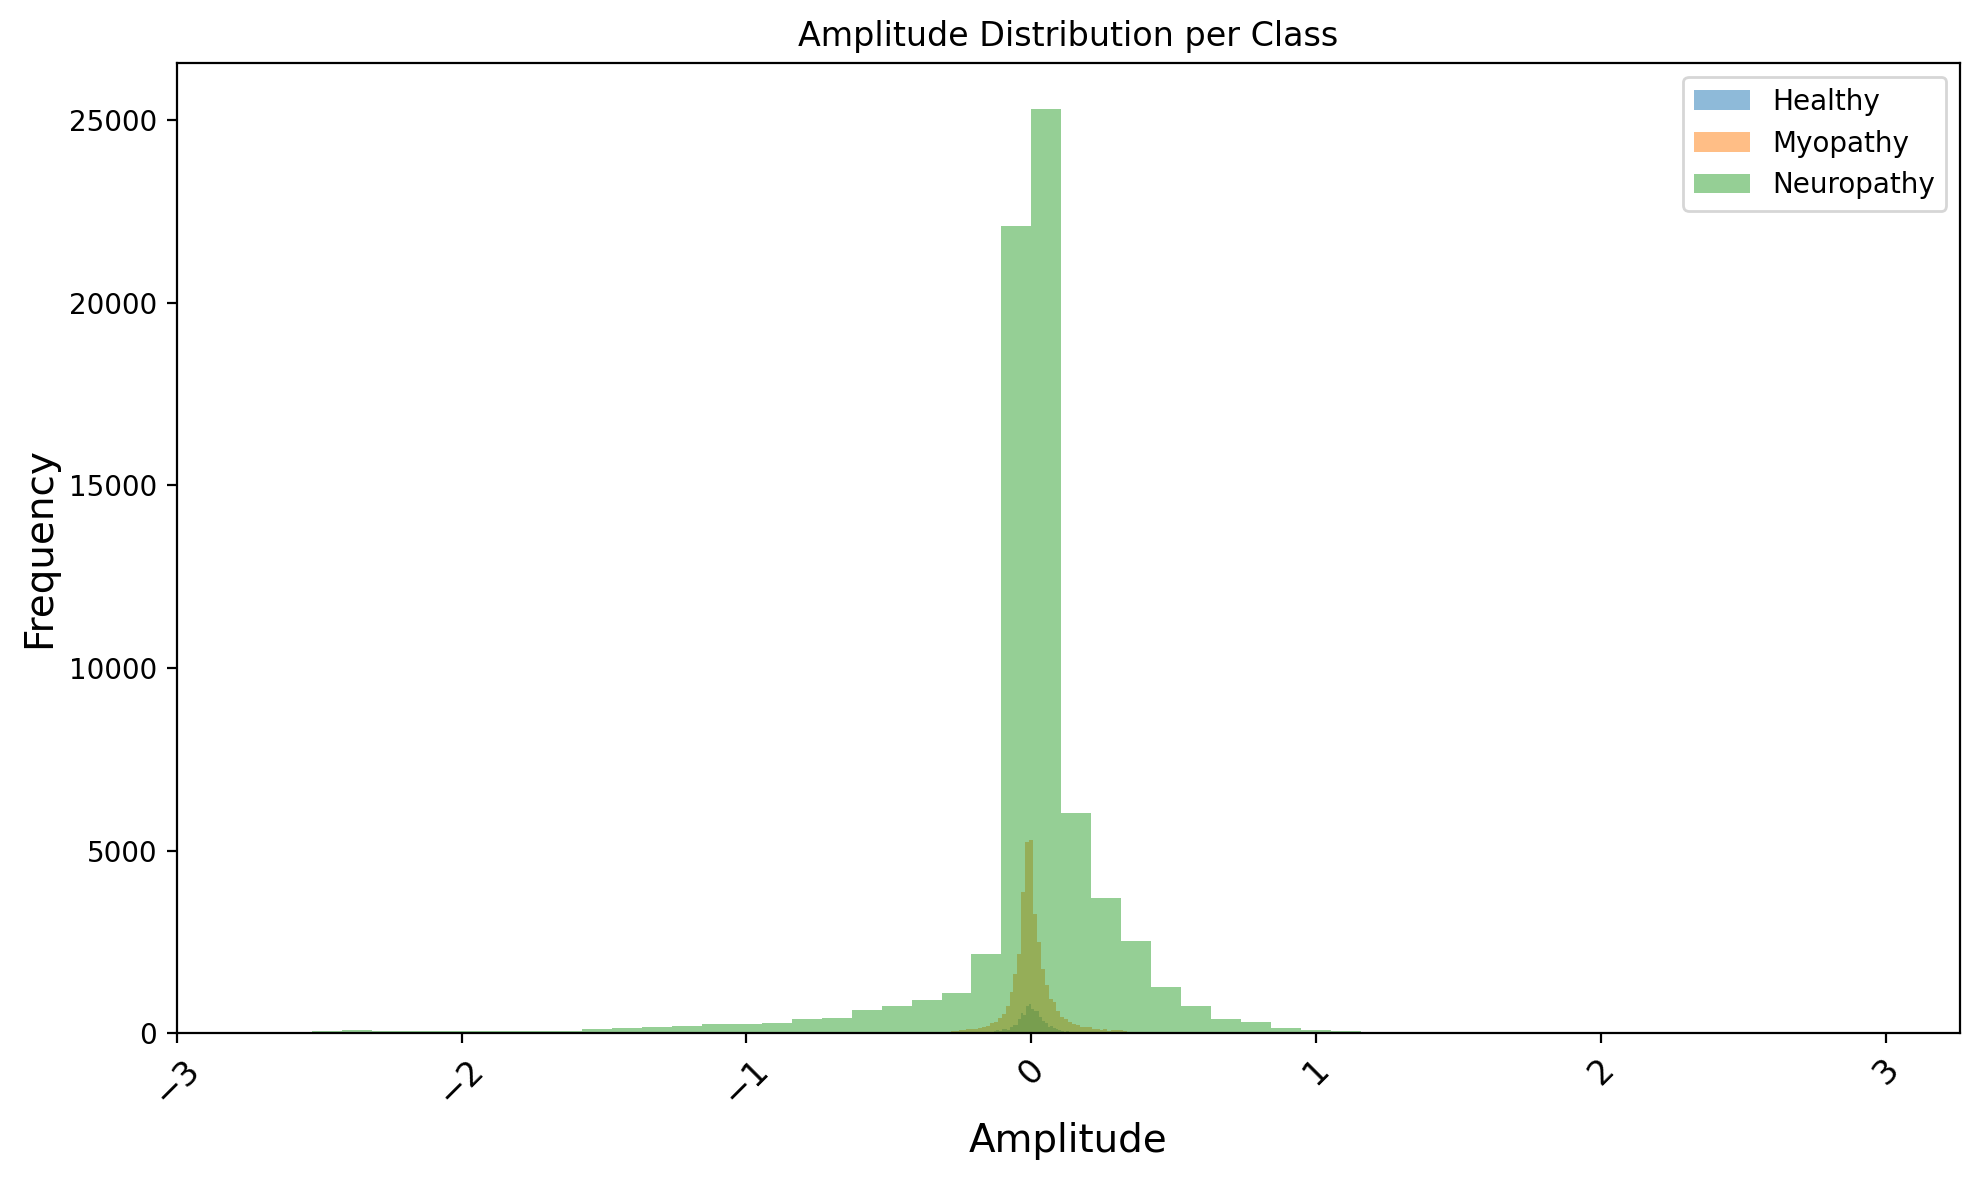

In [49]:
# Convert to numeric and handle non-numeric values
train_patient1.iloc[:, 1] = pd.to_numeric(train_patient1.iloc[:, 1], errors='coerce')
train_patient2.iloc[:, 1] = pd.to_numeric(train_patient2.iloc[:, 1], errors='coerce')
train_patient3.iloc[:, 1] = pd.to_numeric(train_patient3.iloc[:, 1], errors='coerce')

# maximum value of all patients' data 
max_val = max(train_patient1.iloc[:, 1].max(), train_patient2.iloc[:, 1].max(), train_patient3.iloc[:, 1].max())

x_start = -3  
x_end = max_val 

step_size = 1  

# Plotting the histograms for each patient
plt.figure(figsize=(10, 6), dpi=200)
plt.hist(train_patient1.iloc[:, 1], bins=100, alpha=0.5, label='Healthy')
plt.hist(train_patient2.iloc[:, 1], bins=100, alpha=0.5, label='Myopathy')
plt.hist(train_patient3.iloc[:, 1], bins=100, alpha=0.5, label='Neuropathy')

plt.title('Amplitude Distribution per Class')
plt.xlabel('Amplitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim([x_start, x_end])
plt.xticks(np.arange(x_start, x_end, step_size), rotation=45, fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('Amplitude_Distribution_PER_Class.png')
plt.show()

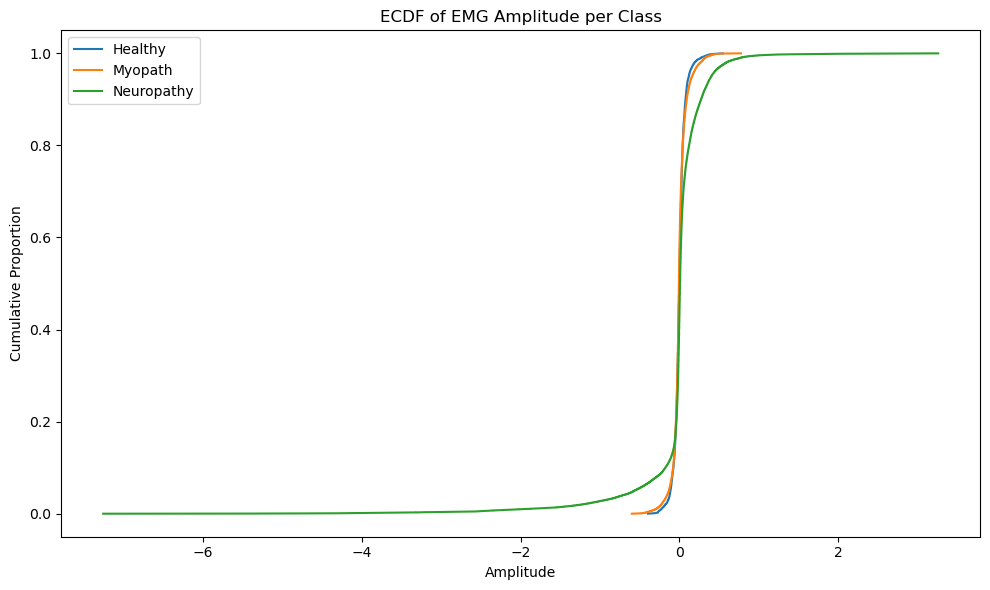

In [50]:
def plot_ecdf(data, label):
    # sort data and compute the ECDF values
    sorted_data = np.sort(data)
    y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y_vals, label=label)

plt.figure(figsize=(10, 6))
plot_ecdf(train_patient1.iloc[:, 1], 'Healthy')
plot_ecdf(train_patient2.iloc[:, 1], 'Myopath')
plot_ecdf(train_patient3.iloc[:, 1], 'Neuropathy')
plt.title('ECDF of EMG Amplitude per Class')
plt.xlabel('Amplitude')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.tight_layout()
plt.savefig('ECDF_EMG_Amplitude.png')
plt.show()



In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Healthy
axs[0].scatter(train_patient1.iloc[:, 0], train_patient1.iloc[:, 1], label='Healthy', alpha=0.5)
axs[0].set_title('Healthy Patient Scatter Plot')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot for Myopathy
axs[1].scatter(train_patient2.iloc[:, 0], train_patient2.iloc[:, 1], label='Neuropathy', alpha=0.5)
axs[1].set_title('Myopathy Patient Scatter Plot')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Plot for Neuropathy
axs[2].scatter(train_patient3.iloc[:, 0], train_patient3.iloc[:, 1], label='Myopathy', alpha=0.5)
axs[2].set_title('Neuropathy Patient Scatter Plot')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.savefig('scatter_Amplitude_over_Time.png')
plt.tight_layout()
plt.show()

In [ ]:
# Root Mean Square (RMS) of EMG signal
# The root-mean-square (RMS) of an electromyographic (EMG) signal is a measurement of the signal's power, 
# which provides insight into its amplitude. It's a common parameter used to assess the level of muscle activation
# caused by the central nervous system (CNS).

def compute_rms(data):
    return np.sqrt(np.mean(data**2))

rms_healthy = compute_rms(train_patient1.iloc[:, 1])
rms_neuropathy = compute_rms(train_patient2.iloc[:, 1])
rms_myopathy = compute_rms(train_patient3.iloc[:, 1])

# Plotting RMS values
plt.figure(figsize=(10, 6))
plt.bar(['Healthy', 'Myopathy', 'Neuropathy'], [rms_healthy, rms_neuropathy, rms_myopathy], color=['blue', 'green', 'red'])
plt.title('Root Mean Square (RMS) of EMG Signal per Class')
plt.ylabel('RMS Value')
plt.tight_layout()
plt.savefig('RMS_signal.png')
plt.show()

/tmp/ipykernel_12637/4004319857.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


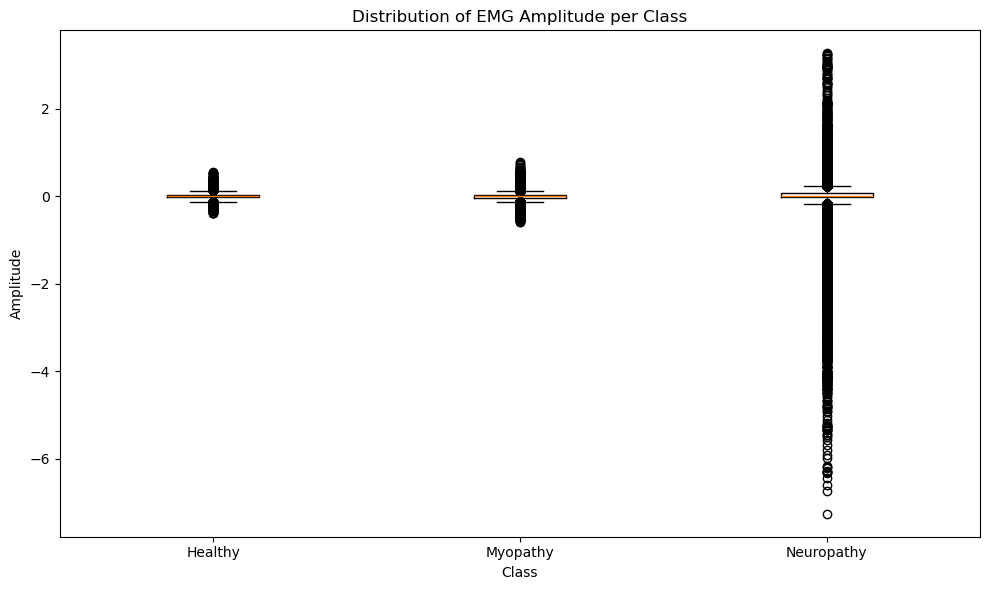

In [74]:
# Visualize the box plots 
plt.figure(figsize=(10, 6))
plt.boxplot(
    [train_patient1.iloc[:, 1].dropna(), train_patient2.iloc[:, 1].dropna(), train_patient3.iloc[:, 1].dropna()],
    labels=['Healthy', 'Myopathy', 'Neuropathy']
)
plt.title('Distribution of EMG Amplitude per Class')
plt.xlabel('Class')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig('box_plot_amplitude.png')
plt.show()